**Project:** Data Minining Project for  X company

The CRISP-DM Framework


The CRISP-DM methodology provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.
* Business understanding (BU): Determine Business Objectives, Assess Situation, Determine Data Mining Goals, Produce Project Plan

* Data understanding (DU): Collect Initial Data, Describe Data, Explore Data, Verify Data Quality

* Data preparation (DP): Select Data, Clean Data, Construct Data, Integrate Data

* Modeling (M): Select modeling technique, Generate Test Design, Build Model, Assess Model
*  Evaluation (E): Evaluate Results, Review Process, Determine Next Steps
*  Deployment (D): Plan Deployment, Plan Monitoring and Maintenance, Produce Final Report, Review Project


References:

[What is the CRISP-DM methodology?](https://www.sv-europe.com/crisp-dm-methodology/)

[Introduction to CRISP DM Framework for Data Science and Machine Learning](https://www.linkedin.com/pulse/chapter-1-introduction-crisp-dm-framework-data-science-anshul-roy/)

**Data Set**
### The data is for company X which is trying to control attrition. 
### There are two sets of data: "Existing employees" and "Employees who have left". The following attributes are available for every employee.


*   Satisfaction Level

*   Last evaluation

*   Number of projects

*   Average monthly hours

*   Time spent at the company
*   Whether they have had a work accident


*  Whether they have had a promotion in the last 5 years


*   Departments (column sales)


*   Salary


*  Whether the employee has left


















**Your Role**
 

*   As data science team member X company asked you to answer this two questions.
*  What type of employees is leaving? 

*   Determine which employees are prone to leave next.






Business Understanding

---

This step mostly focuses on understanding the Business in all the different aspects. It follows the below different steps.




* Identify the goal and frame the business problem.
* Prepare Analytical Goal i.e. what type of performance metric and loss function to use
* Gather information on resource, constraints, assumptions, risks etc
* Gather information on resource, constraints, assumptions, risks etc
*   Prepare Work Flow Chart

### Write the main objectives of this project in your words?
minimum of 100 characters

In [ ]:
main_objectives ='''Add your answer text here
you can create python string using (') or (") or 3('), like the text here. The 3(') string can be used 
to write paragraphs, comments in the beginning of functions, etc.. Your answer to the above question 
should replace this text.
'''

In [ ]:
assert len(main_objectives) > 100 
### BEGIN HIDDEN TESTS
assert len(main_objectives) > 80 
### END HIDDEN TESTS

### Outline the different data analysis steps you will follow to carry out the project

In [ ]:
dm_outline = '''Add your answer text here
you can create python string using (') or (") or 3('), like the text here. The 3(') string can be used 
to write paragraphs, comments in the beginning of functions, etc.. Your answer to the above question 
should replace this text.
'''

In [ ]:
assert len(dm_outline) > 100 
### BEGIN HIDDEN TESTS
assert len(dm_outline) > 70 
### END HIDDEN TESTS

### What metrics will you use to measure the performance of your data analysis model? 
Write the equations of the metrics here

e.g. Precision = $\frac{TP}{(TP + FP)}$



Why do you choose these metrics? minimum of 100 characters

In [ ]:
why_metrics = '''Add your answer text here
you can create python string using (') or (") or 3('), like the text here. The 3(') string can be used 
to write paragraphs, comments in the beginning of functions, etc.. Your answer to the above question 
should replace this text.
'''

In [ ]:
assert len(why_metrics) > 100 
### BEGIN HIDDEN TESTS
assert len(why_metrics) > 80 
### END HIDDEN TESTS

### How would you know if your data analysis work is a success or not?
minimum of 100 characters

In [ ]:
how_success = '''Add your answer text here
you can create python string using (') or (") or 3('), like the text here. The 3(') string can be used 
to write paragraphs, comments in the beginning of functions, etc.. Your answer to the above question 
should replace this text.
'''

In [ ]:
assert len(how_success) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

## What kind of challenges do you expect in your analysis?
List at least 3 challenges

In [ ]:
challenge_text = '''Add your answer text here
you can create python string using (') or (") or 3('), like the text here. The 3(') string can be used 
to write paragraphs, comments in the beginning of functions, etc.. Your answer to the above question 
should replace this text.
'''

In [ ]:
assert len(challenge_text) > 100 
### BEGIN HIDDEN TESTS
assert len(how_success) > 80 
### END HIDDEN TESTS

<h2>Using the processed twitter data from yesterday's challenge</h2>.


- Form a new data frame (named `cleanTweet`), containing columns $\textbf{clean-text}$ and $\textbf{polarity}$.

- Write a function `text_category` that takes a value `p` and returns, depending on the value of p, a string `'positive'`, `'negative'` or `'neutral'`.

- Apply this function (`text_category`) on the $\textbf{polarity}$ column of `cleanTweet` in 1 above to form a new column called $\textbf{score}$ in `cleanTweet`.

- Visualize The $\textbf{score}$ column using piechart and barchart

<h5>Now we want to build a classification model on the clean tweet following the steps below:</h5>

* Remove rows from `cleanTweet` where $\textbf{polarity}$ $= 0$ (i.e where $\textbf{score}$ = Neutral) and reset the frame index.
* Construct a column $\textbf{scoremap}$ Use the mapping {'positive':1, 'negative':0} on the $\textbf{score}$ column
* Create feature and target variables `(X,y)` from $\textbf{clean-text}$ and $\textbf{scoremap}$ columns respectively.
* Use `train_test_split` function to construct `(X_train, y_train)` and `(X_test, y_test)` from `(X,y)`

* Build an `SGDClassifier` model from the vectorize train text data. Use `CountVectorizer()` with a $\textit{trigram}$ parameter.

* Evaluate your model on the test data.


In [1]:
import json
import pandas as pd
from textblob import TextBlob

def read_json(json_file: str)->list:
    """
    json file reader to open and read json files into a list
    Args:
    -----
    json_file: str - path of a json file
    
    Returns
    -------
    length of the json file and a list of json
    """
    
    tweets_data = []
    for tweets in open(json_file,'r'):
        tweets_data.append(json.loads(tweets))
    
    return len(tweets_data), tweets_data

class TweetDfExtractor:
    """
    this function will parse tweets json into a pandas dataframe
    
    Return
    ------
    dataframe
    """
    def __init__(self, tweets_list):
        
        self.tweets_list = tweets_list

    # an example function
    def find_statuses_count(self)->list:
        statuses_count = [t['user']['statuses_count'] for t in self.tweets_list]
        return statuses_count
        
    def find_full_text(self)->list:
        texts = []
        for t in self.tweets_list:
            if 'retweeted_status' in t and 'extended_tweet' in t['retweeted_status']:
                texts.append(t['retweeted_status']['extended_tweet']['full_text'])
            else:
                texts.append(t['text'])
        return texts
       
#############################################
    def find_sentiments(self, text)->list:
        polarity,subjectivity = [],[]
        for tx in text:
            blob = TextBlob(tx)
            polarity.append(blob.polarity)
            subjectivity.append(blob.subjectivity)
        return polarity, subjectivity
            
        return [0 for t in self.tweets_list], [0 for t in self.tweets_list]
###############################################
    def find_created_time(self)->list:
       
        return [t['created_at'] for t in self.tweets_list]

    def find_source(self)->list:
        source = [t['source'] for t in self.tweets_list]
        return source

    def find_screen_name(self)->list:
        screen_name = [t['user']['screen_name'] for t in self.tweets_list]
        return screen_name

    def find_followers_count(self)->list:
        followers_count = [t['user']['followers_count'] for t in self.tweets_list]
        return followers_count

    def find_friends_count(self)->list:
        friends_count = [t['user']['friends_count'] for t in self.tweets_list]
        return friends_count
##################################################
    def is_sensitive(self)->list:
        sensitivity = []
        for t in self.tweets_list:
            try:
                is_sensitive = t['possibly_sensitive']
            except KeyError:
                is_sensitive = None
            sensitivity.append(is_sensitive)

        return sensitivity
###################################################
    def find_favourite_count(self)->list:
        favourites_count = []
        for t in self.tweets_list:
            if 'retweeted_status' in t:
                favourites_count.append(t['retweeted_status']['favorite_count'])
            else:
                favourites_count.append(t['favorite_count'])
        return favourites_count
    
    def find_retweet_count(self)->list:
        retweet_count = []
        for t in self.tweets_list:
            if 'retweeted_status' in t:
                retweet_count.append(t['retweeted_status']['retweet_count'])
            else:
                retweet_count.append(t['retweet_count'])
        return retweet_count

    def find_hashtags(self)->list:
        hashtags = [t['entities']['hashtags'] for t in self.tweets_list]
        return hashtags

    def find_mentions(self)->list:
        mentions = [t['entities']['user_mentions'] for t in self.tweets_list]
        return mentions


    def find_location(self)->list:
        locations = []
        for t in self.tweets_list:
            try:
                location = t['user']['location']
            except TypeError:
                location = ''
            locations.append(location)
        return locations

    def find_lang(self)->list:
        langs = [t['lang'] for t in self.tweets_list]
        return langs
        
        
    def get_tweet_df(self, save=False)->pd.DataFrame:
        """required column to be generated you should be creative and add more features"""
        
        columns = ['created_at','statuses_count', 'source', 'original_text','polarity','subjectivity', 'lang', 'favorite_count', 'retweet_count', 
            'original_author', 'followers_count','friends_count','possibly_sensitive', 'hashtags', 'user_mentions', 'place']
        
        created_at = self.find_created_time()
        statuses_count = self.find_statuses_count()
        source = self.find_source()
        text = self.find_full_text()
        polarity, subjectivity = self.find_sentiments(text)
        lang = self.find_lang()
        fav_count = self.find_favourite_count()
        retweet_count = self.find_retweet_count()
        screen_name = self.find_screen_name()
        follower_count = self.find_followers_count()
        friends_count = self.find_friends_count()
        sensitivity = self.is_sensitive()
        hashtags = self.find_hashtags()
        mentions = self.find_mentions()
        location = self.find_location()
        data = list(zip(created_at,statuses_count, source, text, polarity, subjectivity, lang, fav_count, retweet_count, screen_name, follower_count, friends_count, sensitivity, hashtags, mentions, location))
        df = pd.DataFrame(data=data, columns=columns)
        
        if save:
            df.to_csv('processed_tweet_data.csv', index=False)
            print('File Successfully Saved.!!!')
        
        return df


if __name__ == "__main__":
    # required column to be generated you should be creative and add more features
    columns = ['created_at', 'source', 'original_text','clean_text', 'sentiment','polarity','subjectivity', 'lang', 'favorite_count', 'retweet_count', 
    'original_author', 'screen_count', 'followers_count','friends_count','possibly_sensitive', 'hashtags', 'user_mentions', 'place', 'place_coord_boundaries']
    _, tweet_list = read_json("covid19.json")
    #print(tweet_list[0].keys())
    #for key in tweet_list[0].keys():
        #print(key,':',tweet_list[0][key])
    tweet = TweetDfExtractor(tweet_list)
    tweet_df = tweet.get_tweet_df() 

    # use all defined functions to generate a dataframe with the specified columns above


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/dev

In [28]:
#clean_tweets = pd.read_csv('cleaned_fintech_data.csv')

In [34]:
#clean_tweet = pd.DataFrame(columns=['clean_text','polarity'])
#print(0)

#clean_tweet['clean_text'] =  list(clean_tweets['clean_text'])
#clean_tweet['polarity'] = list(clean_tweets['polarity'])

AttributeError: type object 'object' has no attribute 'dtype'

In [27]:
clean_tweet = tweet_df[['clean_text','polarity']]
clean_tweet[['polarity']] == 'polarity'
clean_tweet['polarity'] = pd.to_numeric(clean_tweet['polarity'])
clean_tweet.dropna()

KeyError: "['clean_text'] not in index"

In [3]:
def text_category(p):
    if p <= -0.66:
        return 'negative'
    elif p > -0.66 and p <= 0.33:
        return 'neutral'
    else:
        return 'positive'

In [4]:

clean_tweet['score'] = clean_tweet['polarity'].apply(text_category)
clean_tweet

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,original_text,polarity,score
0,"🚨Africa is ""in the midst of a full-blown third...",1.666667e-01,neutral
1,"Dr Moeti is head of WHO in Africa, and one of ...",1.333333e-01,neutral
2,Thank you @research2note for creating this ama...,3.166667e-01,neutral
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",8.611111e-02,neutral
4,I think it’s important that we don’t sell COVA...,2.800000e-01,neutral
5,I’m pleased to welcome the #WeCanDoThis bus to...,5.083333e-01,positive
6,Yet another amazingly qualified and courageous...,3.700743e-17,neutral
7,Yet another amazingly qualified and courageous...,3.700743e-17,neutral
8,"Dr Moeti is head of WHO in Africa, and one of ...",1.333333e-01,neutral
9,It is really something to see new research com...,3.727273e-01,positive


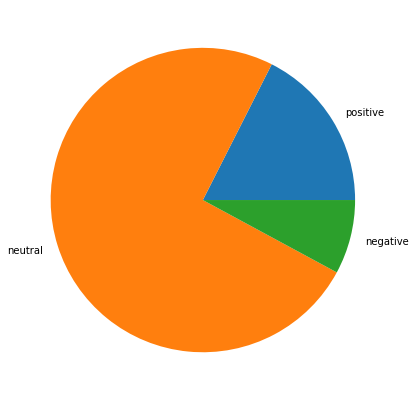

In [7]:
def summerize(x):
    return {
        'positive': x.count('positive'),
        'neutral': x.count('neutral'),
        'negative': x.count('negative')  
    }
summary = summerize(list(clean_tweet['score']))

labels = list(summary.keys())
  
data = [summary[key] for key in summary.keys()]

import matplotlib.pyplot as plt
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)
  
# show plot
plt.show()


In [8]:
new_df = clean_tweet[clean_tweet['score'] != 'neutral']

In [9]:
newdf = new_df.reset_index(drop=True)

In [10]:
def score_to_bin(x):
    if x == 'positive':
        return 1
    if x == 'negative':
        return 0


In [11]:
newdf['scoremap'] = newdf['score'].apply(score_to_bin)
newdf

,original_text,polarity,score,scoremap
0,I’m pleased to welcome the #WeCanDoThis bus to...,0.508333,positive,1
1,It is really something to see new research com...,0.372727,positive,1
2,I’m pleased to welcome the #WeCanDoThis bus to...,0.508333,positive,1
3,It is really something to see new research com...,0.372727,positive,1
4,It is really something to see new research com...,0.372727,positive,1
5,So glad to join training day for the DC #COVID...,0.625000,positive,1
6,[MB] ☀️ WINNIPEG ☀️ \nAvailable mRNA vaccines!...,0.625000,positive,1
7,That's great. But there are now *zero* appoint...,0.400000,positive,1
8,A free 6/23 webinar will review the state of #...,0.400000,positive,1
9,It is really something to see new research com...,0.372727,positive,1


In [20]:
X,y = list(newdf['original_text']),list(newdf['scoremap'])

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(3, 3))
X = vectorizer.fit_transform(X).toarray()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
len(X_train)

1328

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sgdclassifier', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', ma..._state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [24]:
clf.score(X_test,y_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.9909638554216867